In [ ]:
# !pip install pymc
# !pip install scikit-learn

import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from IPython.display import Image

In [5]:
d = pd.read_csv('wines2012.csv')

# Standardize 'score' and convert 'judge' and 'wine' to numeric
d['score'] = StandardScaler().fit_transform(d[['score']])
d['judge'] = pd.factorize(d['judge'])[0]
d['wine'] = pd.factorize(d['wine'])[0]
d['judge.amer'] = np.where(d['judge.amer'] == 1, 0, 1)

# Modeling each wine's scores

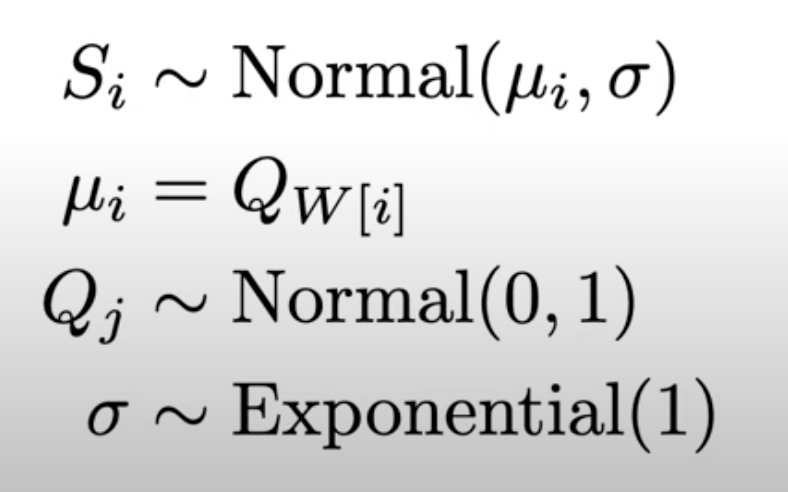

In [2]:
Image("model_spec_1.png", width=300, height=150)

In [3]:
with pm.Model() as mQ:
    # Priors
    Q = pm.Normal('Q', mu=0, sigma=1, shape=d['wine'].nunique())
    sigma = pm.Exponential('sigma', 1)

    # Expected value of outcome
    mu = Q[d['wine'].values]

    # Likelihood (sampling distribution) of observations
    S = pm.Normal('S', mu=mu, sigma=sigma, observed=d['score'])

    # draw 2000 posterior samples
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Q, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 13 seconds.


In [6]:
pm.summary(trace).round(2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Q[0],0.14,0.32,-0.49,0.73,0.0,0.0,19262.0,5511.0,1.0
Q[1],0.27,0.32,-0.33,0.85,0.0,0.0,19046.0,5912.0,1.0
Q[2],-0.12,0.32,-0.74,0.46,0.0,0.0,15566.0,5957.0,1.0
Q[3],0.29,0.32,-0.33,0.88,0.0,0.0,20474.0,5834.0,1.0
Q[4],0.09,0.32,-0.50,0.69,0.0,0.0,17943.0,5885.0,1.0
Q[5],-0.01,0.32,-0.59,0.61,0.0,0.0,21132.0,5627.0,1.0
Q[6],-0.11,0.31,-0.68,0.50,0.0,0.0,19878.0,5808.0,1.0
Q[7],-0.22,0.32,-0.77,0.40,0.0,0.0,18324.0,5991.0,1.0
Q[8],-0.14,0.32,-0.73,0.45,0.0,0.0,20767.0,6072.0,1.0
Q[9],-0.16,0.32,-0.75,0.45,0.0,0.0,18822.0,5464.0,1.0


array([[<Axes: title={'center': 'Q'}>, <Axes: title={'center': 'Q'}>]],
      dtype=object)

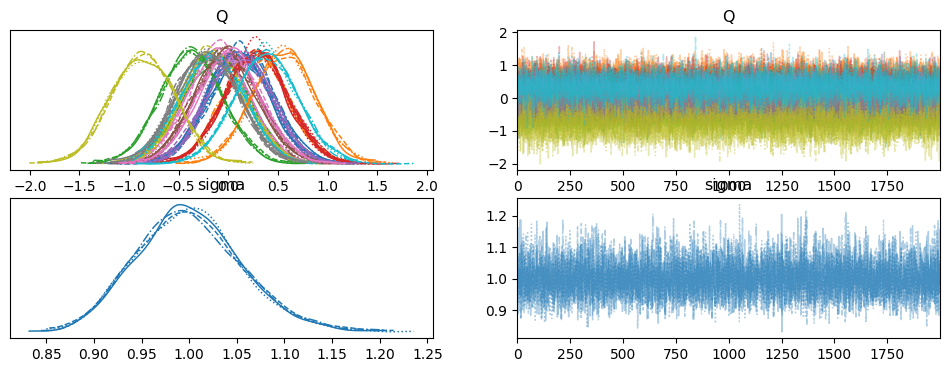

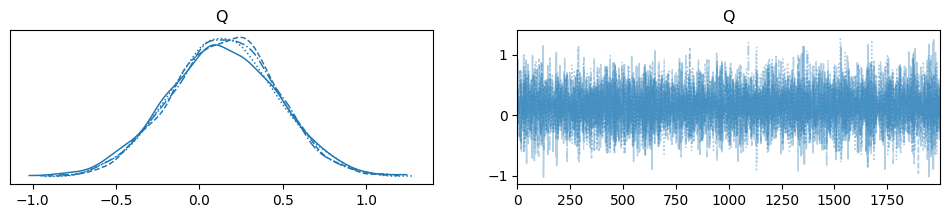

In [7]:
pm.plot_trace(trace)

# Extract a single level of Q:
dat = trace.posterior.data_vars['Q'].sel({'Q_dim_0': 0})
pm.plot_trace(dat)

array([<Axes: title={'center': 'Q\n0'}>, <Axes: title={'center': 'Q\n1'}>,
       <Axes: title={'center': 'Q\n2'}>, <Axes: title={'center': 'Q\n3'}>],
      dtype=object)

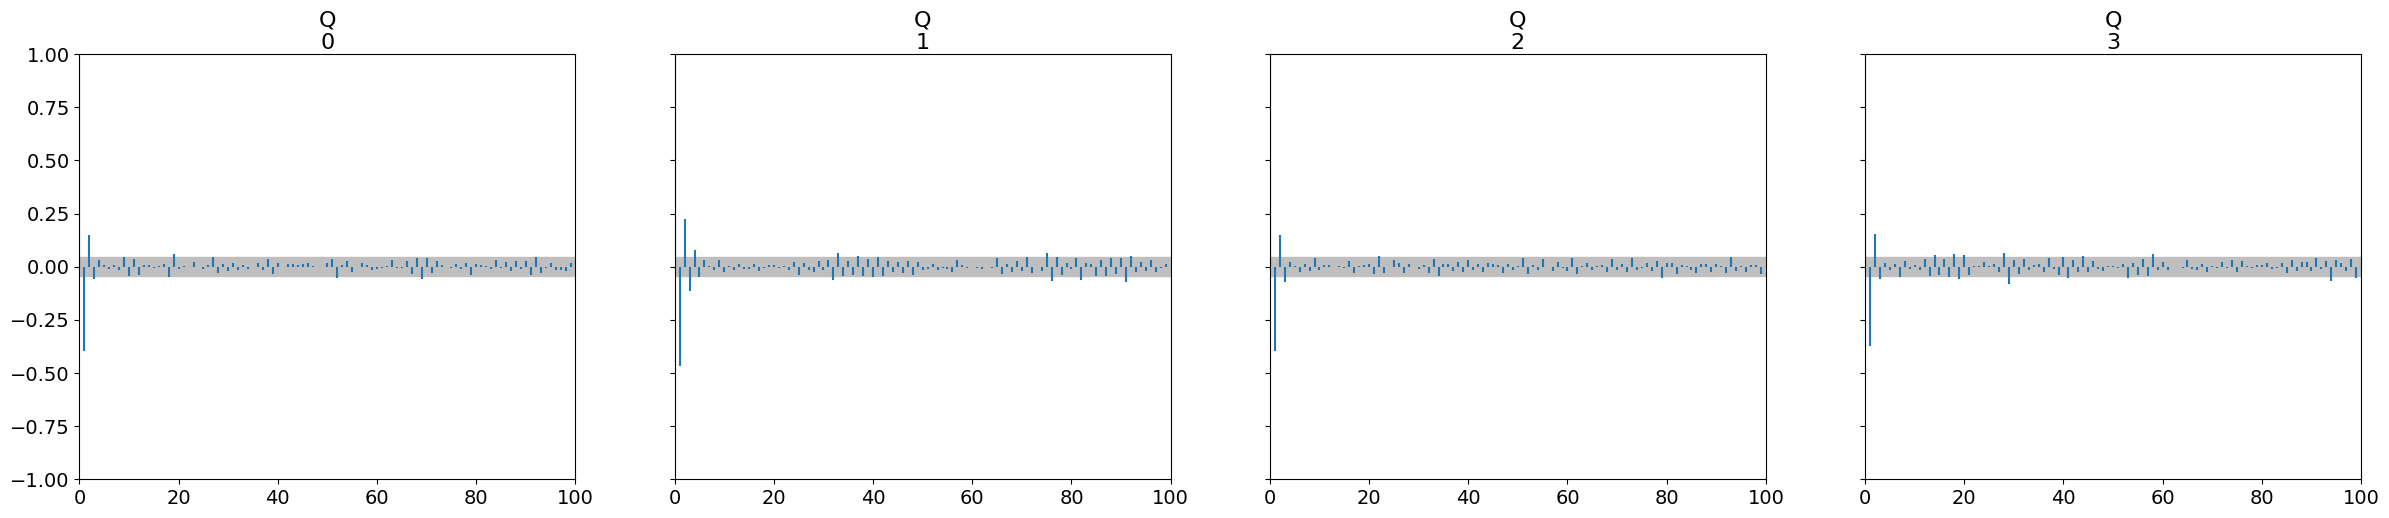

In [8]:
# This will produce a very large plot:
# pm.plot_autocorr(trace)

# Just plot one level as an example:
az.plot_autocorr(dat)

# Add in wine origin

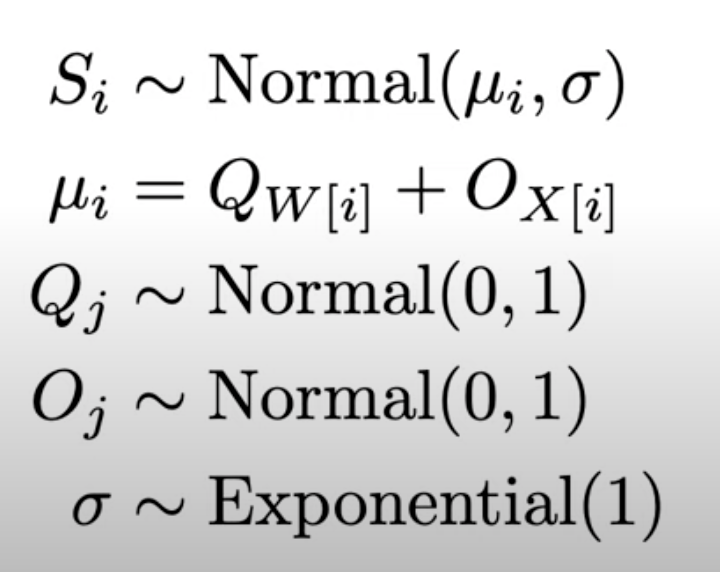

In [9]:
Image("model_spec_2.png", width=300, height=150)

In [10]:
with pm.Model() as mQ:
    # Priors
    Q = pm.Normal('Q', mu=0, sigma=1, shape=d['wine'].nunique())
    O = pm.Normal('O', mu=0, sigma=1, shape=d['judge.amer'].nunique())
    sigma = pm.Exponential('sigma', 1)

    mu = Q[d['wine'].values] + O[d['judge.amer'].values]

    S = pm.Normal('S', mu=mu, sigma=sigma, observed=d['score'])

    # draw 2000 posterior samples
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Q, O, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 16 seconds.


In [11]:
pm.summary(trace, hdi_prob=0.95).round(2)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Q[0],0.14,0.37,-0.58,0.88,0.01,0.0,3045.0,4160.0,1.0
Q[1],0.28,0.38,-0.42,1.04,0.01,0.0,3018.0,4313.0,1.0
Q[2],-0.12,0.38,-0.87,0.62,0.01,0.0,3166.0,4692.0,1.0
Q[3],0.29,0.38,-0.46,1.01,0.01,0.0,2930.0,4948.0,1.0
Q[4],0.09,0.38,-0.66,0.80,0.01,0.0,2802.0,4591.0,1.0
Q[5],-0.01,0.37,-0.70,0.76,0.01,0.0,3075.0,4463.0,1.0
Q[6],-0.10,0.37,-0.80,0.65,0.01,0.0,3048.0,5022.0,1.0
Q[7],-0.21,0.37,-0.94,0.53,0.01,0.0,3263.0,5448.0,1.0
Q[8],-0.14,0.37,-0.85,0.59,0.01,0.0,3068.0,4425.0,1.0
Q[9],-0.16,0.37,-0.88,0.55,0.01,0.0,3018.0,4717.0,1.0


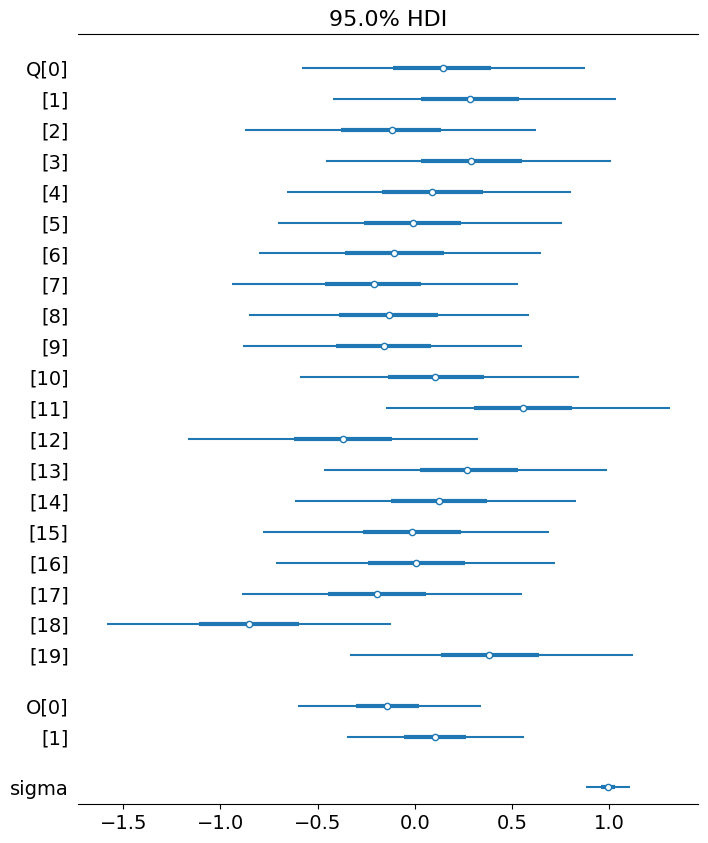

In [12]:
az.plot_forest(trace, hdi_prob=0.95, combined=True, figsize=(8, 10))
plt.show()

# Add in judges

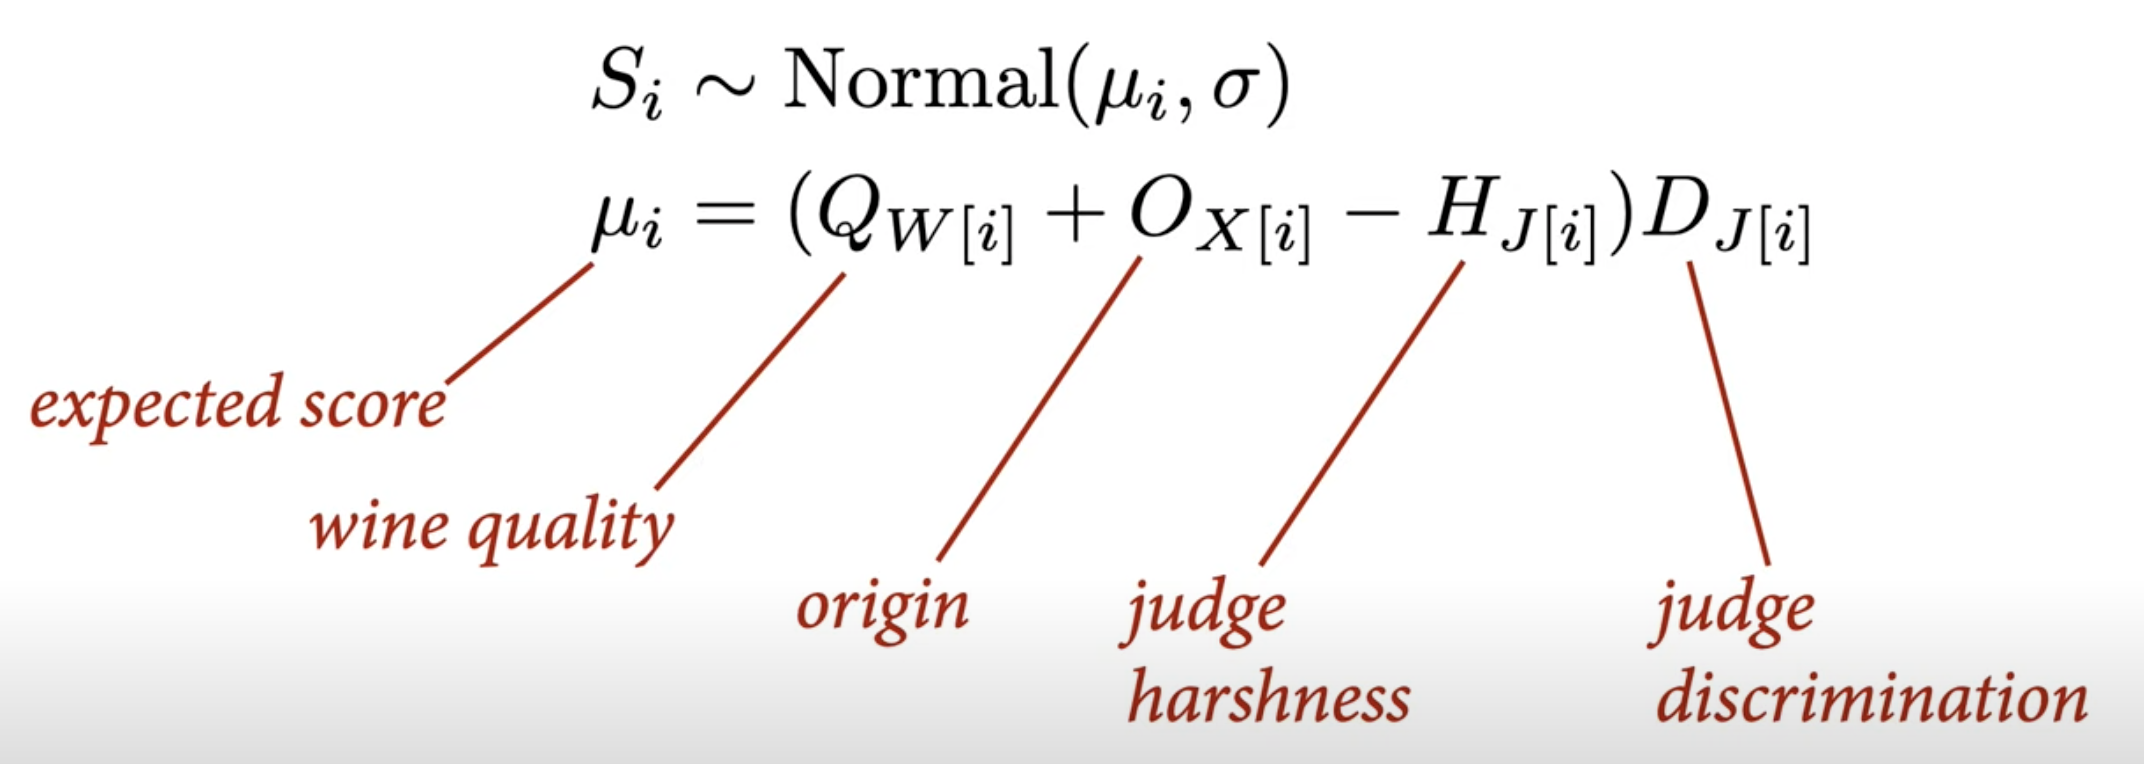

In [13]:
Image("model_spec_3a.png", width=600, height=300)

Harshness - how good a wine needs to be for judge j to rate it as average.  
Discrimination - if  0, the judge assigns all wines to be average.

(From item-response theory).

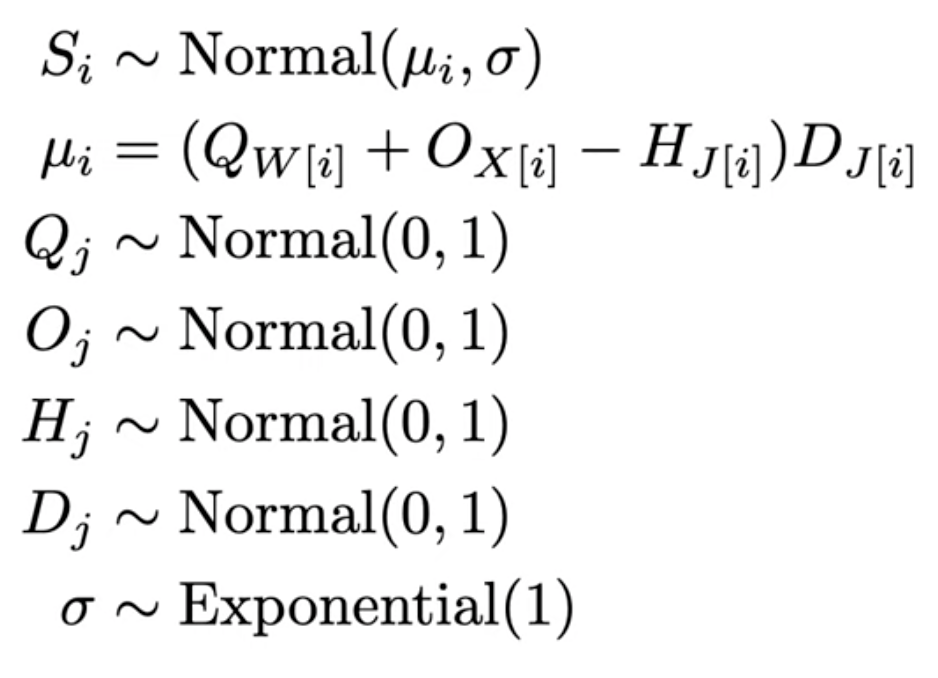

In [14]:
Image("model_spec_3b.png", width=300, height=150)

In [15]:
with pm.Model() as mQ:
    # Priors
    Q = pm.Normal('Q', mu=0, sigma=1, shape=d['wine'].nunique())
    O = pm.Normal('O', mu=0, sigma=1, shape=d['judge.amer'].nunique())
    H = pm.Normal('H', mu=0, sigma=1, shape=d['judge'].nunique())
    D = pm.Exponential('D', 1, shape=d['judge'].nunique())
    sigma = pm.Exponential('sigma', 1)

    # Expected value of outcome
    mu = (Q[d['wine'].values] + O[d['judge.amer'].values] - H[d['judge'].values]) * D[d['judge'].values]

    # Likelihood (sampling distribution) of observations
    S = pm.Normal('S', mu=mu, sigma=sigma, observed=d['score'])

    # draw 2000 posterior samples
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Q, O, H, D, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 51 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.


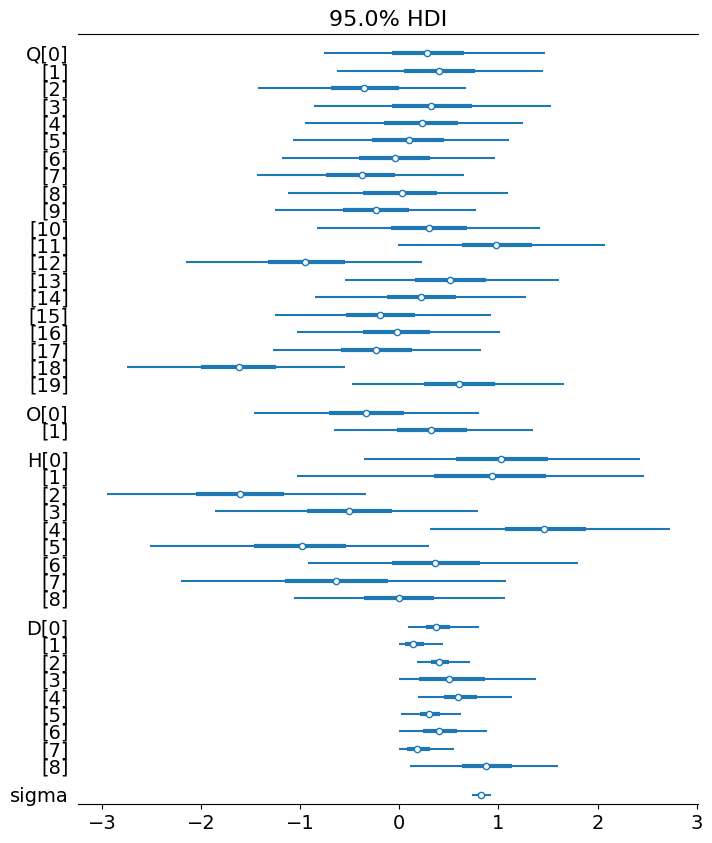

In [16]:
az.plot_forest(trace, hdi_prob=0.95, combined=True, figsize=(8, 10))
plt.show()